# Table of Contents
 <p><div class="lev1"><a href="#Problem-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Problem 1</a></div><div class="lev1"><a href="#Problem-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Problem 2</a></div><div class="lev1"><a href="#Problem-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Problem 3</a></div><div class="lev1"><a href="#Problem-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Problem 4</a></div>

In [1]:
from __future__ import print_function
from __future__ import unicode_literals

import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

from common import spike_generators
from common import util

# Problem 1
Generate spikes for 10 s (or longer if you want better statistics) using a Poisson spike generator with a constant rate of 100 Hz, and record their times of occurrence. Compute the coefficient of variation of the interspike intervals, and the Fano factor for spike counts obtained over counting intervals ranging from 1 to 100 ms. Plot the interspike interval histogram

Coefficient of variation: 1.04108380685
Fano factor for counting intervals in [0, 100] ms: 
[ 1.01744382  1.02267283  1.03403877  1.06559209  1.03417664  1.05570521
  1.04669673  1.07970486  1.04723826  1.04348295  1.0821259   1.07279253
  1.07000962  1.07916581  1.07844925  1.09430649  1.1253111   1.12913402
  1.05407431  1.06261044  1.13602514  1.02401845  1.15891578  1.06508499
  0.9499821   1.13720935  1.0960408   1.1461365   1.1144281   1.10603381
  1.03585027  1.07252337  1.13865411  1.09615066  1.05119943  1.14372652
  1.01744848  1.03294538  1.07444947  1.14998913  1.11215358  1.1541641
  1.16361717  1.14162794  1.07054613  1.15082546  1.04601827  1.04870359
  1.01590148  1.04861732  1.18487639  1.13796249  1.09592398  1.08628303
  1.07839209  1.07711951  1.07346939  1.13701946  1.10322425  1.20046888
  1.23563059  1.2061201   1.18990574  1.10024022  1.08607897  1.11921206
  1.22202326  1.18417123  1.19093657  1.27021307  1.01622711  1.14942118
  1.07642831  1.15697223  1.04586

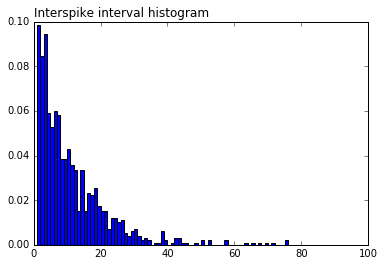

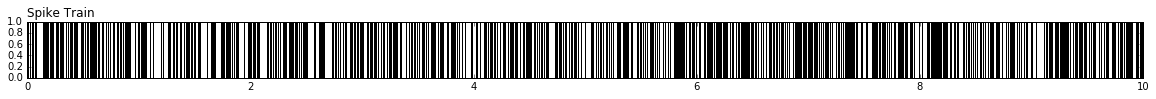

In [2]:
def p1():
    rate = 100
    duration = 10
    spikes = spike_generators.HomogeneousPoissonGenerator(rate).generate(duration)
    print("Coefficient of variation: {}".format(spikes.coefficient_variation()))
    print("Fano factor for counting intervals in [0, 100] ms: \n{}".format(spikes.fano_factor(np.arange(1, 100))))

    util.plot_interspike_interval_histogram(spikes)
    util.plot_spikes(spikes, figsize=(20, 1))
    plt.show()
    
p1()

# Problem 2

Add a refractory period to the Poisson spike generator by allowing the firing rate to depend on time...


Solve the ODE, we get r(t) = r0 - r0 * exp(-t / tau)

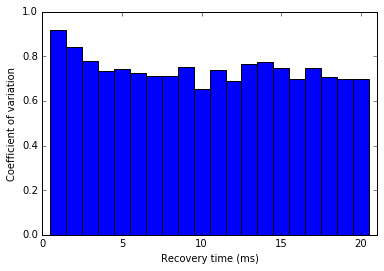

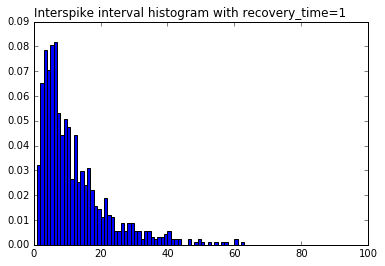

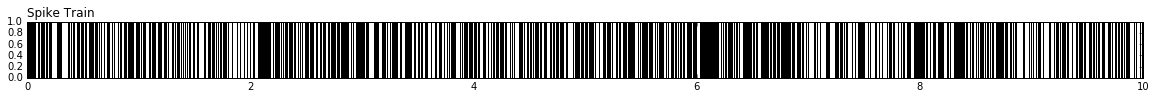

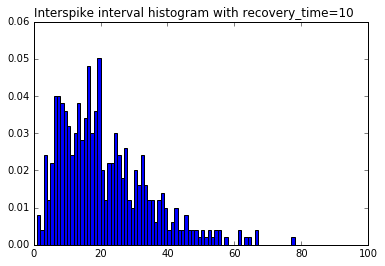

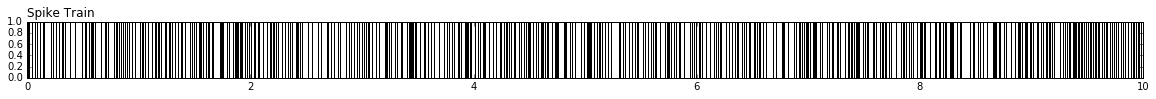

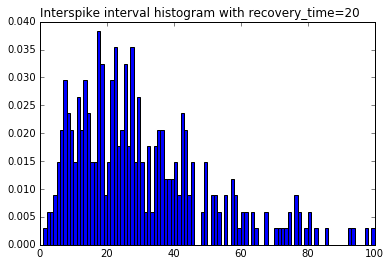

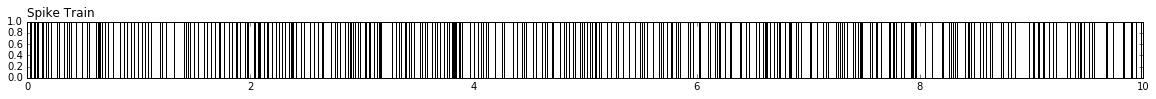

Fano factor for counting intervals in [0, 100] ms when recovery time is 10ms: 
[ 0.953995    0.91198     0.889985    0.81991997  0.81787494  0.76387995
  0.74585994  0.72767974  0.705955    0.6874995   0.68594499  0.6597599
  0.67780494  0.63971989  0.62924925  0.58671795  0.60165986  0.6150991
  0.57342966  0.6012024   0.53757983  0.59067841  0.55564124  0.57007692
  0.56714074  0.58991667  0.57264865  0.55543978  0.55232558  0.4984985
  0.57656306  0.5734359   0.54583498  0.52331973  0.52974001  0.45919418
  0.47214815  0.43085932  0.550875    0.55331184  0.52893054  0.45515966
  0.50405069  0.51335683  0.49574775  0.48402796  0.43407593  0.53215385
  0.57301961  0.52366672  0.54497959  0.49583333  0.50769034  0.4932973
  0.48950722  0.5275484   0.5157315   0.50224152  0.46690906  0.49696977
  0.4763215   0.52987964  0.49382401  0.51887179  0.45965538  0.51323173
  0.48868206  0.54663946  0.40694444  0.49590269  0.4541847   0.45142732
  0.5012503   0.5082963   0.4684905   0.45567594 

In [4]:
def p2():
    max_rate = 100
    duration = 10
    
    recovery_times = range(1, 21)
    all_spikes = [spike_generators
                  .HomogeneousPoissonGeneratorWithRefractory(max_rate, t).generate(duration) for t in recovery_times]
    cv = [s.coefficient_variation() for s in all_spikes]
    plt.figure()
    plt.bar([x-0.5 for x in recovery_times], cv, width=1, bottom=0)
    plt.xlabel('Recovery time (ms)')
    plt.ylabel('Coefficient of variation')
    plt.xlim(0, 21)
    
    for t in [0, 9, 19]:
        util.plot_interspike_interval_histogram(all_spikes[t], 
                                            title='Interspike interval ' +
                                             'histogram with recovery_time={}'.format(recovery_times[t])) 
        util.plot_spikes(all_spikes[t], figsize=(20, 1))
    
    plt.show()
    
    print("Fano factor for counting intervals in [0, 100] ms when recovery time is 10ms: \n{}".format(
            all_spikes[9].fano_factor(np.arange(1, 100))))
    
p2()
    

# Problem 3
Autocorrelation histograms over a range from 0 to 100ms of:
- Poisson generator with constant firing rate of 100Hz
- Poisson generator as in Problem 2
- Variable firing rate `r(t) = 100(1 + cos(2*pi*t)/25 ms))`

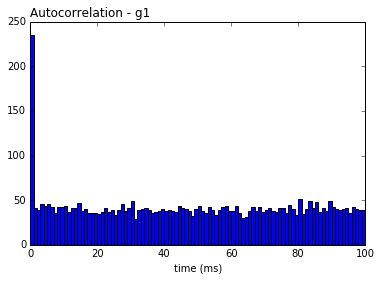

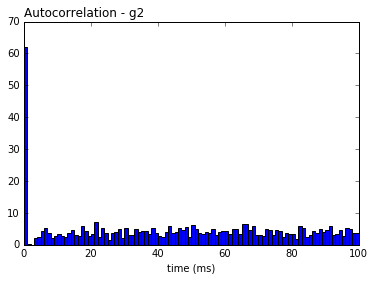

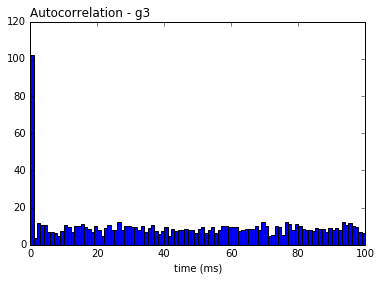

In [3]:
def p3():
    duration = 10
    g1 = spike_generators.HomogeneousPoissonGenerator(200).generate(duration)
    g2 = spike_generators.HomogeneousPoissonGeneratorWithRefractory(max_rate=200, recovery_time=10).generate(duration)
    g3 = spike_generators.PoissonGeneratorWithVariableRate(max_rate=200,
             rate_fn=lambda t: 100 * (1 + np.cos(2 * np.pi * t * 1000.) / 25)).generate(duration)
            
    util.plot_autocorrelation_histogram(g1, bin_size=0.001, bin_count=100, title='Autocorrelation - g1')
    util.plot_autocorrelation_histogram(g2, bin_size=0.001, bin_count=100, title='Autocorrelation - g2')
    util.plot_autocorrelation_histogram(g3, bin_size=0.001, bin_count=100, title='Autocorrelation - g3')
    plt.show()
p3()

# Problem 4
Poisson process with `r(t) = 100(1 + cos(2*pi*t / 300 ms))`

Solve the ODE we have `r(t) = (1 / tau) * exp(-t / tau)`

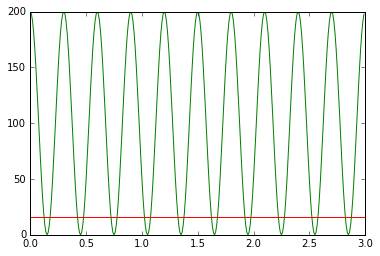

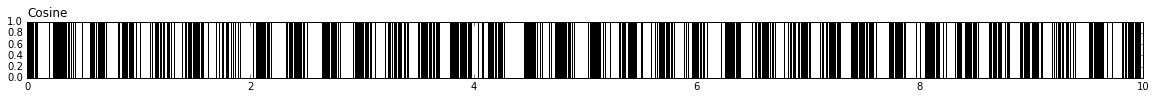

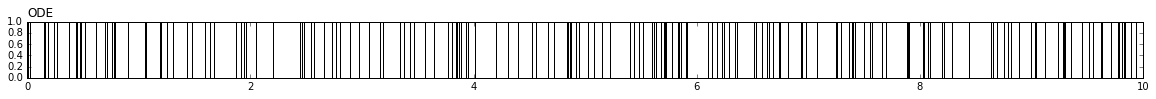

In [23]:
def p4():
    duration = 10
    tau = 50    # in milliseconds
    
    def f1(t):
        return 100 * (1 + np.cos(2 * np.pi * t * 1000. / 300))
    def f2(t, prev_t):
        return (1000.0 / tau) * np.exp(-(t - prev_t) * 1000. / tau)
    
    g1 = spike_generators.PoissonGeneratorWithVariableRate(max_rate=200, rate_fn=f1).generate(duration)
    g2 = spike_generators.PoissonGeneratorWithVariableRate(max_rate=200, rate_fn=f2).generate(duration)
            
    plt.figure()
    x = [_ / 1000. for _ in range(0, 3000, 10)]
    v1 = map(f1, x)
    v2 = [f2(*p) for p in zip(x[1:], x[:-1])]
    plt.plot(x, v1, '-', c='g')
    plt.plot(x[1:], v2, '-', c='r')
    
    util.plot_spikes(g1, figsize=(20, 1), title='Cosine')
    util.plot_spikes(g2, figsize=(20, 1), title='ODE')
    
    plt.show()
p4()